# ACNS: Chapter 2 Exercises

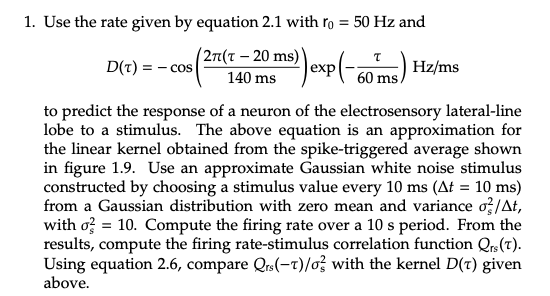

Firing rate given by
$$
r_{est} = r_0 + \int^\infty _0 d\tau D(\tau) s(t-\tau)
$$

where

$$
D(\tau) = - cos\Big[\frac{2*\pi(\tau-t_1)}{t_2}\Big] exp \Big[- \frac{\tau}{t_3}\Big]
$$

with $$ t_1 = 20ms, t_2 = 140ms, t_3 = 60ms $$

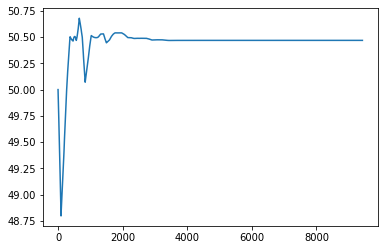

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#constants
r0 = 50 #constant rate in Hz
delta_t = 0.01 #seconds
sigma2_s = 0.010 #σ_s^2
nums = 100
all_t = np.arange(0, 1, delta_t/nums)

#linear kernel equation D(τ)
def D_tau(tau):
  return -np.cos(2*np.pi* (tau - 0.02)/ 0.14)*np.exp(-tau/0.06) #Hz/s

s_all = np.random.randn(len(all_t),nums) * np.sqrt(sigma2_s/delta_t)
for i in range(len(s_all)):
  s_all[i,:] = s_all[i,0]
s_all = np.ndarray.flatten(s_all)

r_vals = []
for i,t in enumerate(all_t):
  tau = np.arange(0,t,delta_t/nums)[::-1]
  D_tau_vals = D_tau(tau)
  s_tau = s_all[:i][::-1]
  if len(D_tau_vals)!=len(s_tau):
    continue
  r_vals.append(r0 + np.dot(D_tau_vals, s_tau)/nums)

plt.plot(r_vals)
plt.show()

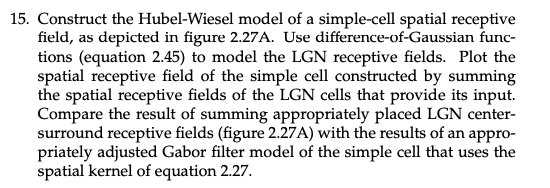

In [2]:
from mpl_toolkits import mplot3d

Difference-of-Gaussians

In [3]:
# Defining the parameters
sigma_cen = 0.3 
sigma_sur = 1.5 
B = 5
x = np.linspace(-2,2,150)
y = np.linspace(-2,2,150)
x, y = np.meshgrid(x, y)
D = (1/(2*np.pi*sigma_cen**2)) * np.exp(- (x**2 + y**2)/(2*sigma_cen**2)) - (B/(2*np.pi*sigma_sur**2)) * np.exp(- (x**2 + y**2)/(2*sigma_sur**2))

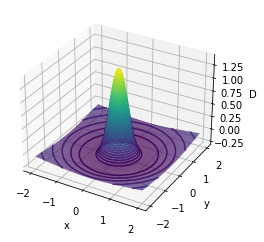

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D, 50)
ax.plot_surface(x, y, D, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
plt.show()

Gabor function

In [5]:
sigma_x = 1
sigma_y = 2
k = 1/0.56
phi = 1- np.pi/2 
x = np.linspace(-4,4,150)
y = np.linspace(-5,5,150)
x, y = np.meshgrid(x, y)
D1= 1/(2*np.pi*sigma_x*sigma_y) * np.exp(- x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2)) * np.cos(k*x-phi)

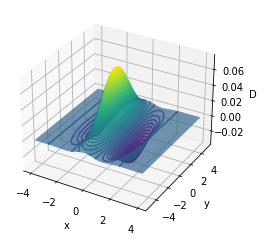

In [6]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D1, 50)
ax.plot_surface(x, y, D1, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
plt.show()

Comparison

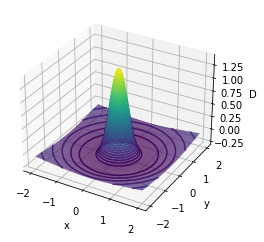

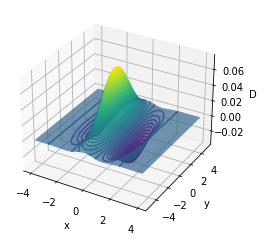

In [7]:
sigma_cen = 0.3 
sigma_sur = 1.5 
B = 5
x = np.linspace(-2,2,150)
y = np.linspace(-2,2,150)
x, y = np.meshgrid(x, y)
D = (1/(2*np.pi*sigma_cen**2)) * np.exp(- (x**2 + y**2)/(2*sigma_cen**2)) - (B/(2*np.pi*sigma_sur**2)) * np.exp(- (x**2 + y**2)/(2*sigma_sur**2))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D, 50)
ax.plot_surface(x, y, D, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
plt.show()

sigma_x = 1
sigma_y = 2
k = 1/0.56
phi = 1- np.pi/2 
x = np.linspace(-4,4,150)
y = np.linspace(-5,5,150)
x, y = np.meshgrid(x, y)
D1= 1/(2*np.pi*sigma_x*sigma_y) * np.exp(- x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2)) * np.cos(k*x-phi)

fig1 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D1, 50)
ax.plot_surface(x, y, D1, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
plt.show()

These two mathematical approximations are providing two different ways of representing the receptive fields of simple cells. The goal is to depict the ON and OFF regions of the kernel $D_s$ being respectively positive or negative, corresponding to how strongly the given neuron is responding to a certain stimulus. 

The Gabor function approach uses a product of a Gaussian function and a sinusoidal function and applies better for simple cells. As a result, we get two separate "bumps", one of positive values for $D_s$ and one of negative $D_s$ representing the ON and OFF regions of activity. The origin of the coordinates is placed at the center of the receptive field, while the boarders between the ON and OFF regions are parallel to the y axis. 
The two bumps shape of the Gabor filter works as an identifier for edges between high and low stimulus regions, right on the plane where the bump becomes negative or positive. 


The difference-of-Gaussians model the spatial structure of the receptive fields of neurons in the retina and LGN. This has a center-surround structure, where there is either a circular central ON region surrounded by an annular OFF region, or the opposite arrangement is happening, with a central OFF region surrounded by an ON region. This ON-center, OFF-center receptive fields are defined by the sign in front of the main parenthesis of $D_s$. The circular shape of the Gaussians which peaks at this very specific region in space works as a position detector, where the filter can identify regions of very high stimulus surrounded by regions of low stimulus. 

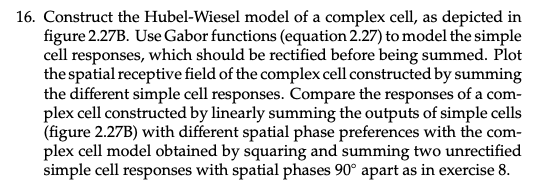

Responses of a complex cell after linearly summing the outputs of simple cells. We rectify the simple cell responses by setting the negative values of the receptive field given by the Gabor functions to zero.


In [19]:
sigma_x = 1
sigma_y = 2
k = 1/0.56
#phi = 1- np.pi/2 
phi_list = np.linspace(0, np.pi, 10)
D_sum = np.zeros((150,150))
x = np.linspace(-4,4,150)
y = np.linspace(-5,5,150)
x, y = np.meshgrid(x, y)
for phi in phi_list:
  D1= 1/(2*np.pi*sigma_x*sigma_y) * np.exp(- x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2)) * np.cos(k*x-phi)
  D1[D1<0] = 0
  D_sum += D1

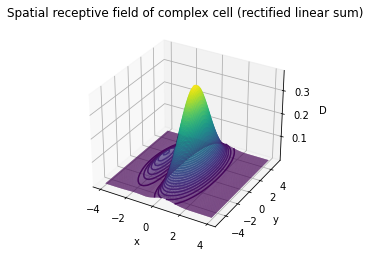

In [20]:
fig3 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D_sum, 50)
ax.plot_surface(x, y, D_sum, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
ax.set_title('Spatial receptive field of complex cell (rectified linear sum)')
plt.show()

Complex cell model obtaind by squaring and summing two unrectified simple cell responses with spatial phases 90 deg apart.

In [21]:
sigma_x = 1
sigma_y = 2
k = 1/0.56
#list of phi for two cells with spatial phases 90deg apart
phis = [np.pi/2, np.pi]
D_sum2 = np.zeros((150,150))
x = np.linspace(-4,4,150)
y = np.linspace(-5,5,150)
x, y = np.meshgrid(x, y)
for phi in phis:
  D = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(- x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2)) * np.cos(k*x-phi)
  D1 = D**2
  D_sum2 += D1

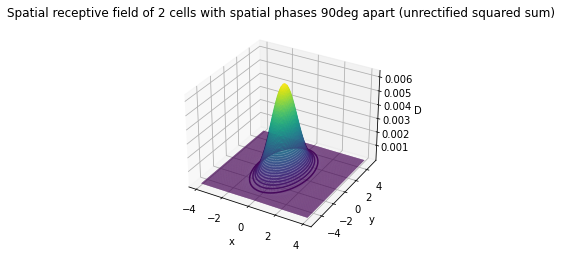

In [22]:
fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D_sum2, 50)
ax.plot_surface(x, y, D_sum2, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
ax.set_title('Spatial receptive field of 2 cells with spatial phases 90deg apart (unrectified squared sum)')
plt.show()

Complex cell model obtaind by rectifying and summing two simple cell responses with spatial phases 90 deg apart.

In [26]:
sigma_x = 1
sigma_y = 2
k = 1/0.56
#phi = 1- np.pi/2 
phi_list = np.linspace(np.pi/2, np.pi)
D_sum = np.zeros((150,150))
x = np.linspace(-4,4,150)
y = np.linspace(-5,5,150)
x, y = np.meshgrid(x, y)
for phi in phi_list:
  D3 = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(- x**2/(2*sigma_x**2) - y**2/(2*sigma_y**2)) * np.cos(k*x-phi)
  D3[D3<0] = 0
  D_sum += D3

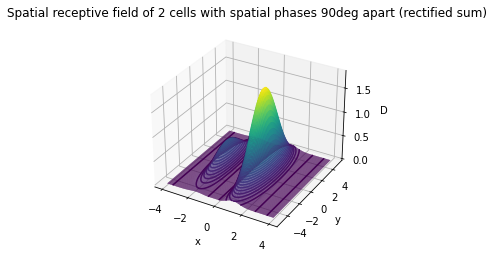

In [27]:
fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, D_sum, 50)
ax.plot_surface(x, y, D_sum, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('D')
ax.set_title('Spatial receptive field of 2 cells with spatial phases 90deg apart (rectified sum)')
plt.show()

By observing the two obtained results of the spatial receptive field, it is clear that the rectified sum of the cell responses is giving a much more narrower overlap. The receptive field is thus more selective to phase variance, as desired. On the other hand, when we are plotting the two cells with spatial phases 90deg apart, we get a broader distribution of the spatial receptive field. This means that essentialy, the complex cell that we are trying to construct is covering a much wider part of the phase space, which is not the desired behavior, since we chose two cells that should not overlap too much because of the wide angle between them. 

The third plot is comparing the receptive field of the complex cell, using again the same two cells with phases 90deg apart, but using the rectifying step. As we can see, this time we are getting a narrower image for the receptive field, as well as larger absolute values for D. 

The above results are a strong argument for no actual squaring of the inputs being done by cells inside the brain. 